In [1]:
%matplotlib inline
from preamble import *
from config import *
plt.rcParams['image.cmap'] = "gray"

# Ch03 无监督学习与预处理


## 3.5 聚类

聚类 ( Clustering ) 将数据集划分成组，这些组叫做簇 ( Cluster ) 。通过划分数据，得到一个划分，
这个划分的簇内数据点相似，簇间数据点不同。

### 3.5.1 K 均值聚类

K 均值聚类：最简单、最常用的聚类算法之一。试图找出代表数据特定区域的簇中心。
算法步骤：
  
-   随机初始化三个簇中心
-   将每个数据点分配给最近的簇中心
-   将每个簇中心设置为所分配的所有数据点的平均值
-   如果簇的分配不再发生变化，那么算法结束。

1.  K 均值的失败案例：识别的簇要求必须是凸的 ( Convex ) ，无法识别非球形簇。
2.  K 均值的失量量化 ( Vector Quantization ) ：
将 K 均值看作分解方法，每个点用单一分量来表示，即失量量化。
例如：将二维数据聚成 10 个簇中心，每个点到簇中心的距离作为一个特征，
这样就把 2 维特征的数据变换成 10 维特征的数据。

Text(0.5, 0.98, '图3-23：输入数据与K均值算法的三个步骤')

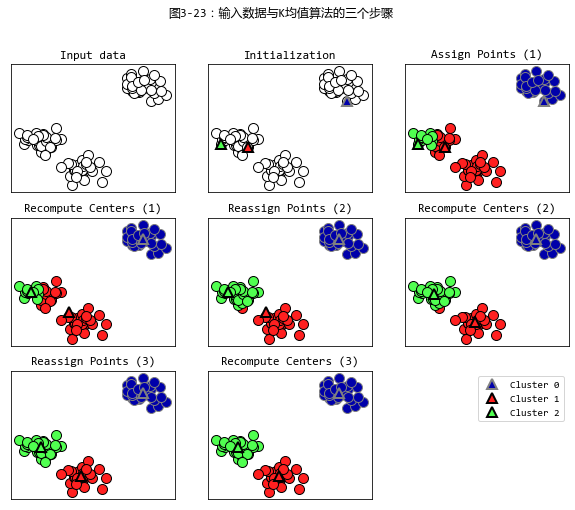

In [2]:
mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("图3-23：输入数据与K均值算法的三个步骤")

Text(0.5, 0.98, '图3-24：K均值算法找到的簇中心和簇边界')

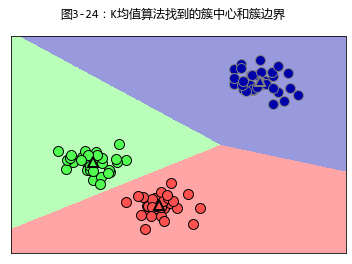

In [3]:
mglearn.plots.plot_kmeans_boundaries()
plt.suptitle("图3-24：K均值算法找到的簇中心和簇边界")

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成人工二维数据
X, y = make_blobs(random_state=1)

# 构造聚类模型
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2
 0]


In [6]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2
 0]


Text(0.5, 1.0, '原始数据的散点图')

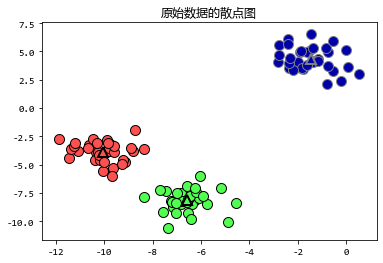

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.title("原始数据的散点图")

Text(0.5, 1.0, '5个簇')

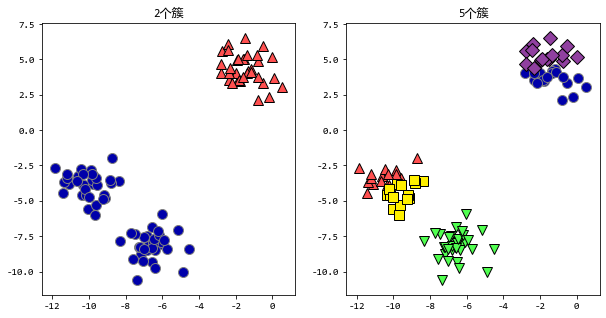

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
axes[0].set_title("2个簇")

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
axes[1].set_title("5个簇")

#### 1. K 均值的失败案例
K均值算法要求每个簇都是凸形（convex）的。

Text(0.5, 1.0, '图3-27：簇的密度不同时，K均值找到的簇分配')

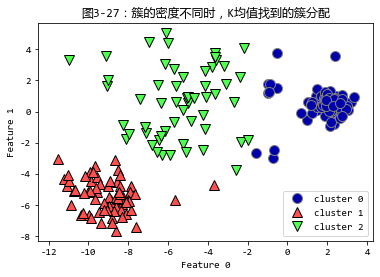

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],    # 定义不同的簇密度
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("图3-27：簇的密度不同时，K均值找到的簇分配")

Text(0.5, 1.0, '图3-28：K均值无法识别非球形簇')

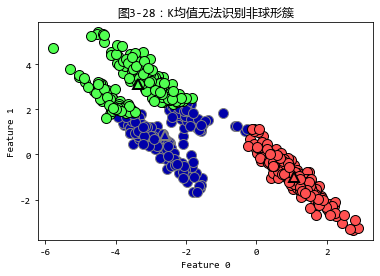

In [10]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 使用「K均值」算法将数据聚类到三个簇
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("图3-28：K均值无法识别非球形簇")

Text(0.5, 1.0, '图3-29：K均值无法识别具有复杂形式的簇')

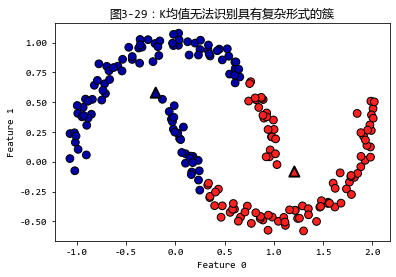

In [11]:
# 生成 two_moons 数据 (带少量噪声)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 使用 KNN 聚类两个簇
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("图3-29：K均值无法识别具有复杂形式的簇")

#### 2. 失量量化，也是 K 均值分解
K均值利用簇中心来表示每个数据点，即用一个分量来表示每个数据点，这个分量由簇中心给出，被称为失量量化（Vector Quantization）

In [12]:
from datasets.load_data import load_people
people = load_people()
image_shape = people.images[0].shape
# 生成一个全0的mask矩阵
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 将每个人的前50条数据设置为1，方便取出
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# 将灰度值缩放到[0,1]之间，而不是[0,255]之间，可以得到更好的数据稳定性
X_people = X_people / 255.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=seed)
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

from sklearn.decomposition import PCA
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

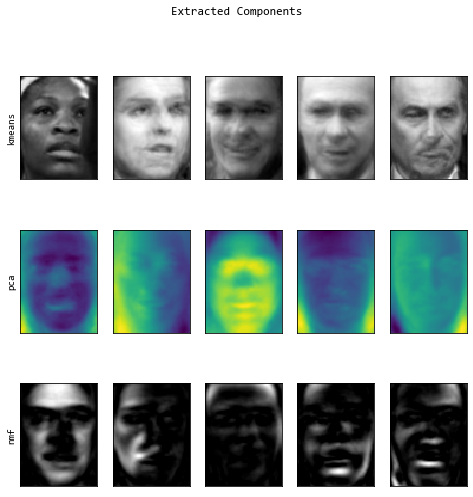

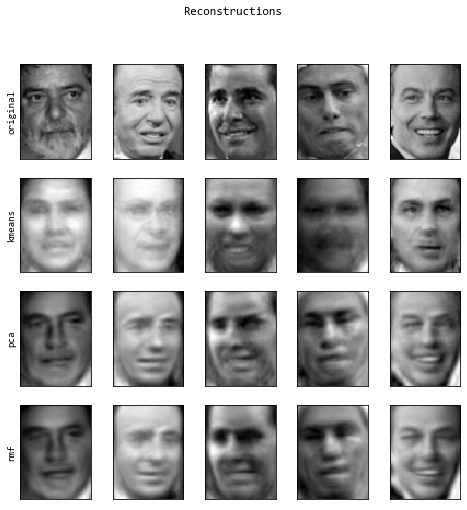

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9
 6 1 5 8 4 9 6 9 8 7 2 0 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5 2 8 3 9 0 9 2 4 4 6 0 5 6
 2 7]


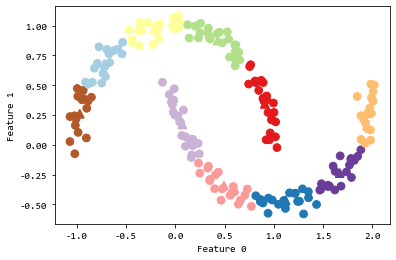

In [14]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [15]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[1.547 1.034 0.525 0.925 0.201 1.166 0.826 1.141 1.125 1.808]
 [2.569 0.508 1.729 1.127 1.013 0.724 1.644 0.15  2.276 2.668]
 [0.809 1.359 0.75  0.804 0.932 1.974 0.138 1.765 0.719 0.951]
 [0.811 2.175 1.734 1.538 1.975 2.994 1.119 2.694 1.316 0.338]
 [2.63  0.713 1.698 1.286 1.    0.471 1.731 0.12  2.286 2.772]
 [2.702 0.874 1.719 1.422 1.047 0.313 1.825 0.291 2.328 2.87 ]
 [1.761 0.692 0.86  0.735 0.148 0.98  0.906 0.825 1.411 1.947]
 [1.989 0.231 1.439 0.421 0.832 1.303 1.051 0.819 1.827 2.005]
 [1.651 0.862 0.692 0.819 0.026 1.06  0.852 0.978 1.266 1.874]
 [2.203 0.067 1.568 0.652 0.901 1.155 1.262 0.625 2.007 2.234]
 [0.389 1.968 0.793 1.452 1.362 2.385 0.788 2.294 0.202 0.833]
 [1.334 0.901 1.128 0.268 0.88  1.778 0.445 1.42  1.291 1.317]
 [2.665 0.775 1.714 1.341 1.024 0.416 1.773 0.184 2.31  2.816]
 [2.222 0.115 1.504 0.727 0.81  0.995 1.284 0.481 1.984 2.287]
 [0.107 2.236 1.273 1.645 1.758 2.803 1.011 2.642 0.688 0.411]
 [

### 3.5.2 凝聚聚类 ( agglomerative clustering )

凝聚聚类，也叫 AGNES ( AGglomerative NESting ) ，是层次聚类的一种，并且可以将层次聚类可视化为树状图。

是许多基于相同原则构建的聚类算法。

依据链接准则，将度量“最相似的簇”合并，直到簇的个数满足停止准则。

scikit-learn使用了以下三种凝聚准则：
  - ward：默认选项。挑选两个簇合并，使得所有簇的方差增加最小，可以得到大小差不多相等的簇
  - average：将簇中所有点之间的平均距离最小的两个簇合并
  - complete：也叫最大链接。将簇中点之间最大距离最小的两个簇合并

注：ward 适用于大多数数据集。如果簇中的成员个数非常不同(数据比例不均匀)，使用 average 或者 complete 可能效果更好。

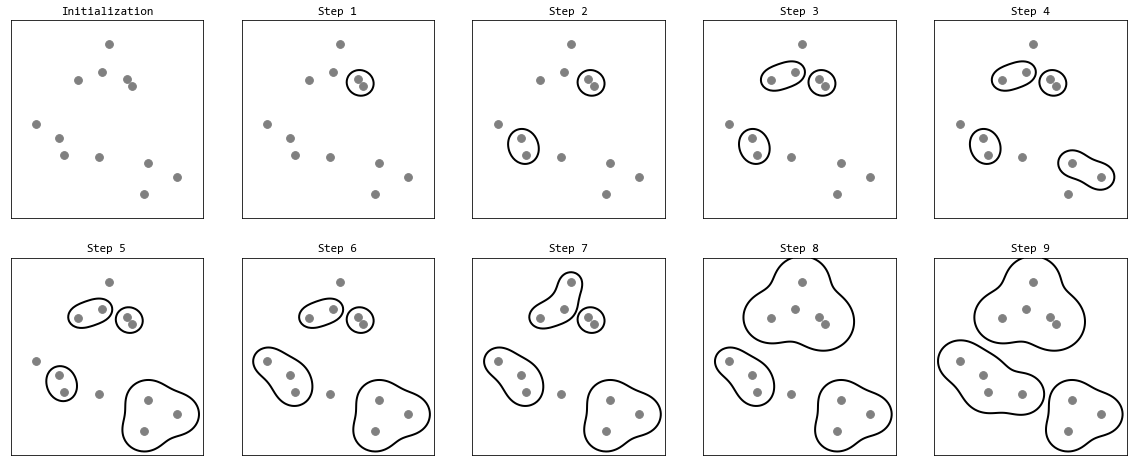

In [16]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

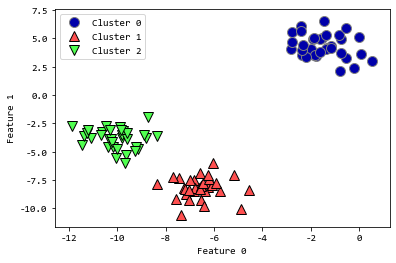

In [17]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 1. 层次聚类与树状图
凝聚聚类生成的就是一种层次聚类（Hierarchical Clustering）。

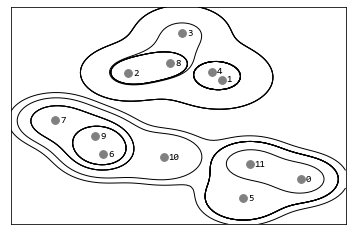

In [18]:
mglearn.plots.plot_agglomerative()

Text(0.5, 1.0, '图3-36：图3-35中聚类的树状图（用线表示划分成两个簇和三个簇）')

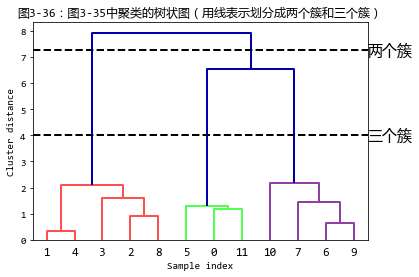

In [19]:
# 层次聚类无法展现超过二维的数据，而树状图可以
# 树状图可以使用SciPy提供的函数来生成，函数接受数据数组，再计算出链接数组
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
# ward()实现聚类
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
# dendrogram()绘制树状图
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, '两个簇', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, '三个簇', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("图3-36：图3-35中聚类的树状图（用线表示划分成两个簇和三个簇）")

### 3.5.3 DBSCAN

具有噪声的基于密度的空间聚类应用：不需要预先设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。

原理：识别特征空间中「拥挤」的区域，区域中的点靠近在一起，这些区域被称为特征空间中的密集区域。

-   密集区域内的点被称为核心样本。
-   与核心点的距离在 eps 的范围内的点被称为边界点。
-   不属于任何簇的点被称为噪声。

DBSCAN（Density-Based Spatial Clustering of Applications with Noise），即“具有噪声的基于密度的空间聚类应用”。
-   优点：不需要用户先验地设置簇的个数，可以划分具有复杂开头的簇，可以找出不属于任何簇的点
-   缺点：比凝聚聚类和K均值的速度慢
-   原理：识别特征空间的“拥挤”区域中的点，这些数据点靠在一起的区域称为密集区域。
-   思想：簇由数据的密集区域确定，并由相对较空的区域隔开。

-   在密集区域内的点被称为核心样本（Core Sample），也叫「核心点」。
-   与核心点的距离在eps之内的点称为「边界点」。
-   距离起始点的距离在eps范围内的数据点个数小于min_samples时，这个起始点被称为「噪声点」。

DBSCAN使用两个参数：min_samples和eps定义。
-   如果在距一个给定数据eps的距离内至少有min_samples个数据点，那么这个数据点就是核心样本，这些核心样本放在一个簇内。

DBSCAN对访问顺序会有轻度依赖。

In [20]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 0.98, '图3-37：DBSCAN找到的簇分配')

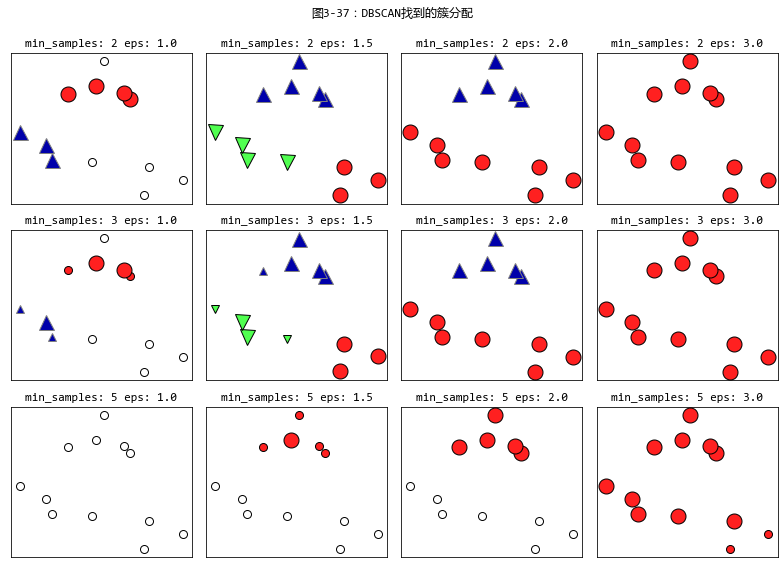

In [21]:
mglearn.plots.plot_dbscan()
plt.subplots_adjust(top=0.9)
plt.suptitle("图3-37：DBSCAN找到的簇分配")

Text(0.5, 0.98, '图3-38：DBSCAN找到的簇分配')

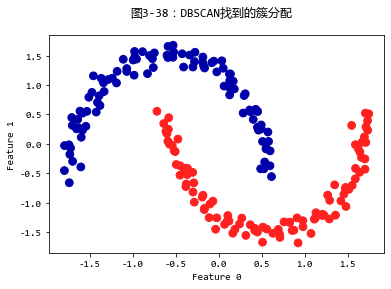

In [22]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.suptitle("图3-38：DBSCAN找到的簇分配")

### 3.5.4 聚类算法的对比和评估

#### 1.  用真实值评估聚类：ARI ( adjusted rand index ) 和 NMI ( normalized mutual information )
ARI（Adjusted Rand Index) : 

-   RI = (a + b) / C(n,2)
    -   分子：属性一致的样本数，即同属于这一类或都不属于这一类。        
        -   a是真实在同一类、预测也在同一类的样本数；
        -   b是真实在不同类、预测也在不同类的样本数;
    -   分母：任意两个样本为一类有多少种组合
-   ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
    -   [ARI is a symmetric measure](https://en.wikipedia.org/wiki/Rand_index#Adjusted_Rand_index)：adjusted_rand_score(a, b) == adjusted_rand_score(b, a)
-   NMI（Normalized Mutual Information）：对互信息的归一化。

注：聚类算法的评估还可以参考[周志华，2018]，Sec9.3，P199

Text(0.5, 0.98, '图3-39：基于AR对two_moons数据集上算法进行评价')

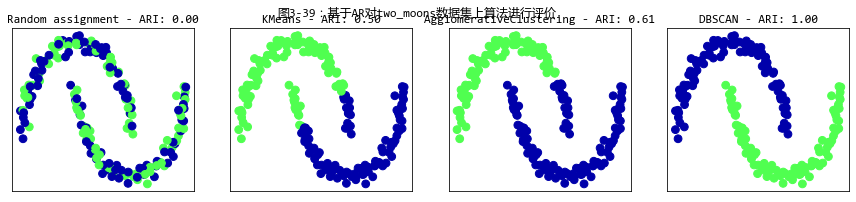

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(
            algorithm.__class__.__name__,
            adjusted_rand_score(y, clusters)))
plt.suptitle("图3-39：基于AR对two_moons数据集上算法进行评价")            

In [24]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


#### 2.  无真实值评估聚类：轮廓系数 ( silhouette coefficient )

（轮廓系数：计算簇的紧致度，越大越好，满分为1，要求簇的形状不能过于复杂）实际效果不好，例如：DBSCAN的分类得分却低于KMeans。
-   基于鲁棒性的聚类指标：先向数据中添加一些噪声，或者使用不同的参数设定，然后运行算法，并对结果进行比较。
-   基于鲁棒性的聚类指标的思想：如果许多算法参数和许多数据扰动返回相同的结果，那么这个指标可能是可信的。Scikit-Learn还未实现。

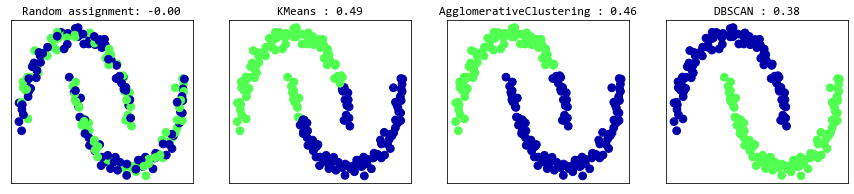

In [25]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成均值为0，方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,s=60)
    ax.set_title("{} : {:.2f}".format(
        algorithm.__class__.__name__,
        silhouette_score(X_scaled, clusters)))

#### 3.  在人脸数据集上比较算法

无法保证聚类是按照人所需要的语义要求分类的，因此唯一的办法就是人工分析
-   DBSCAN：容易发现异常值 ( outlier ) ，也容易找出相似图片的共性。
-   K 均值：分类的簇中数据点个数更加均匀，距离较近的数据共性较强。
-   凝聚聚类：容易得到共性更强的数据，也不容易受噪声影响。

In [26]:
# extract eigenfaces from lfw data and transform data
# 从人脸数据中抽取特征脸
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

##### 使用 DBSCAN 分析人脸数据集
DBSCAN 可以找出异常数据，但是异常数据不代表错误数据，只是无法在数据集中找到其他有共性的数据，有时异常数据可能代表的是信息量大的数据

In [27]:
# 使用「DBSCAN」的默认参数
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [28]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [29]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [30]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
# 统计簇与噪声中数据的个数
# bincount() 函数不允许出现负值，因为 labels 需要加 1
# 统计结果中第一个数据是噪声的个数
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  26 1763]


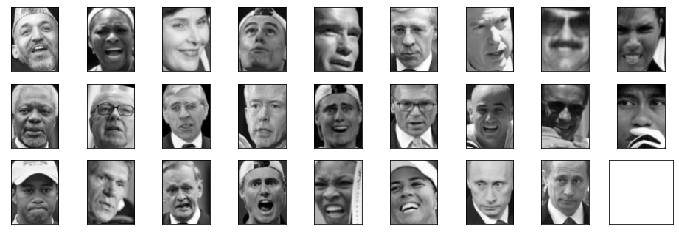

In [31]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [32]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [1789]

eps=3
Number of clusters: 1
Cluster sizes: [1789]

eps=5
Number of clusters: 1
Cluster sizes: [1789]

eps=7
Number of clusters: 9
Cluster sizes: [1754    3   12    3    3    3    3    5    3]

eps=9
Number of clusters: 6
Cluster sizes: [1115  662    3    3    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 378 1411]

eps=13
Number of clusters: 2
Cluster sizes: [ 108 1681]


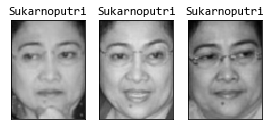

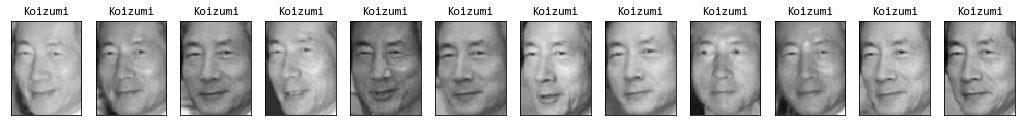

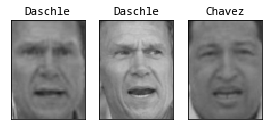

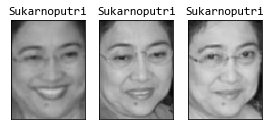

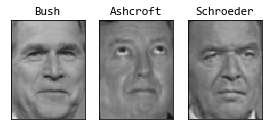

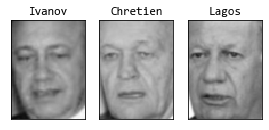

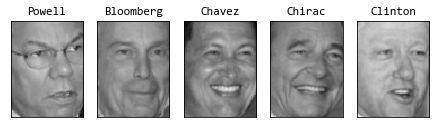

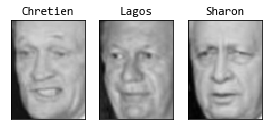

In [33]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

##### 使用 K 均值分析人脸数据集
K 均值可以创建更加均匀大小的簇，降维的PCA可以增加图像的平滑度

In [34]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [119 109 271 289 134 149 220 178 199 121]


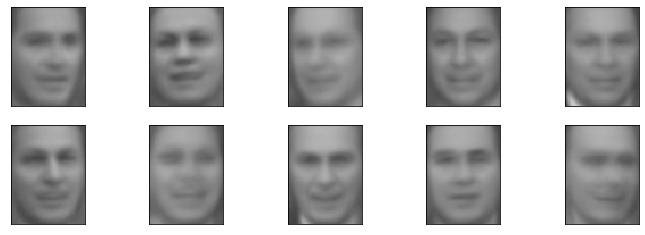

In [35]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

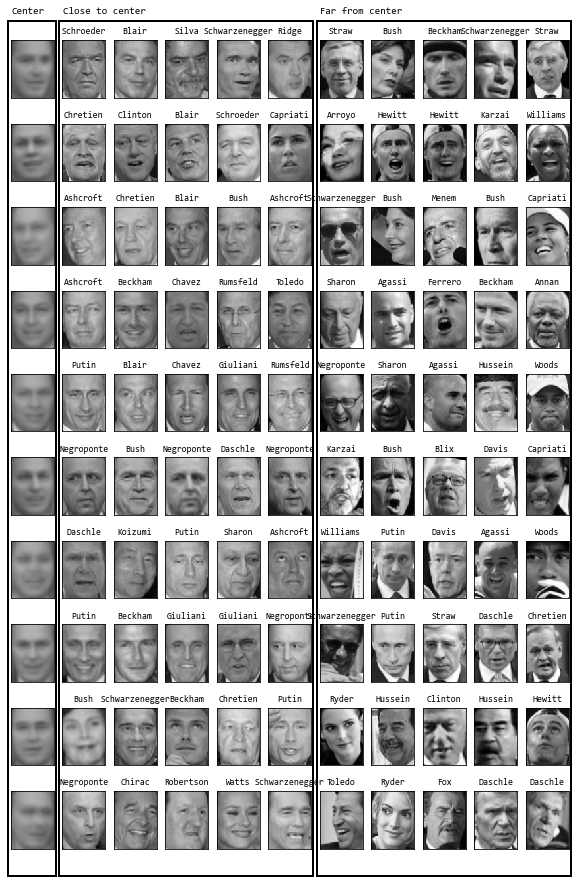

In [36]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,y_people, people.target_names)

##### 用凝聚聚类分析人脸数据集
凝聚聚类生成的也是大小相近的簇，比DBSCAN更加均匀，没有K均值均匀。

In [37]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(
       np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [392 185 137  90 327 315 121  52  75  95]


In [38]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10


Text(0, 0.5, 'Cluster distance')

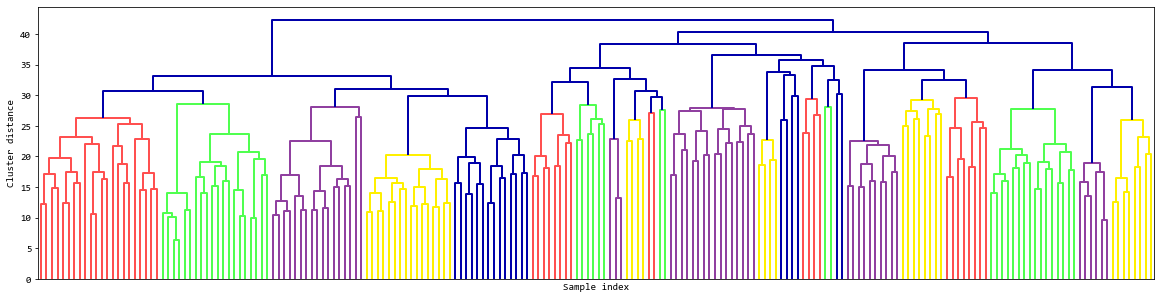

In [39]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

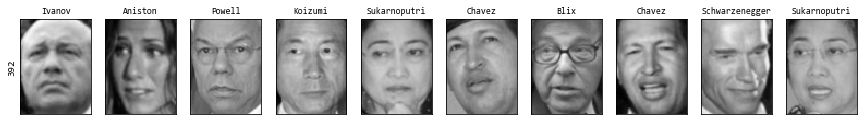

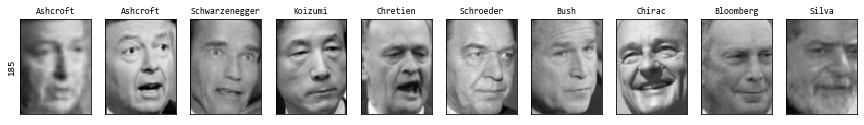

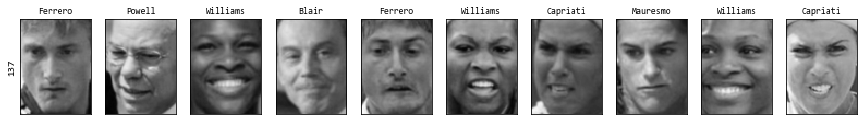

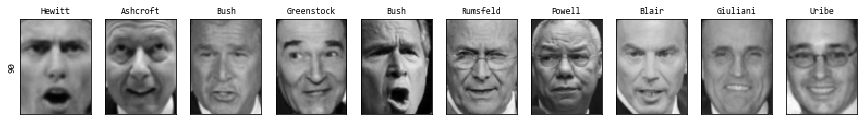

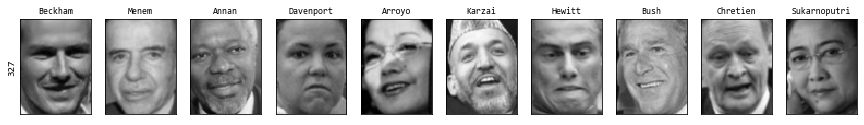

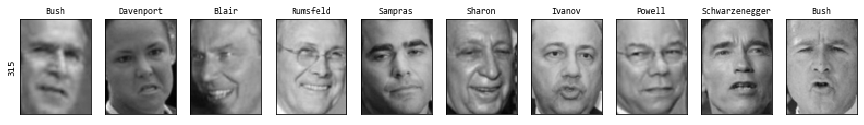

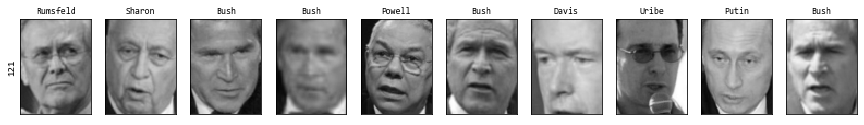

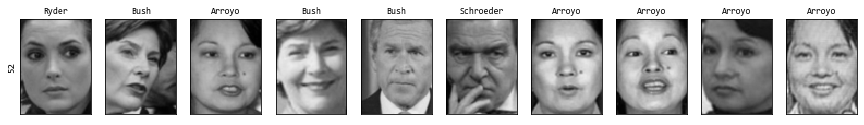

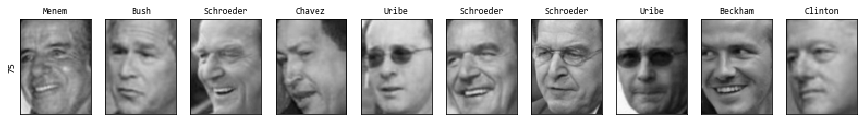

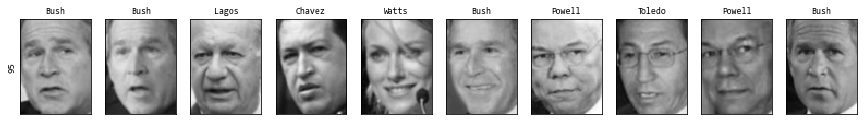

In [40]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

cluster sizes agglomerative clustering:
 [138 119  92  67  66   8  67  41  47  21  62 112   2  23  54  10  77 120  75  51  62  36  32  53  15  27  21  60  11   3   6   2  21  20  20  38  57   8  35  10]


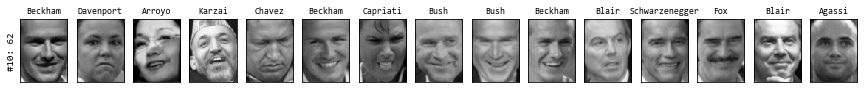

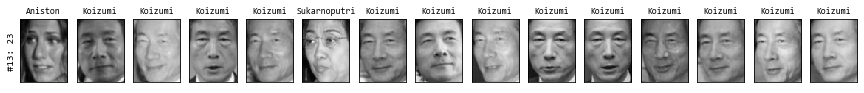

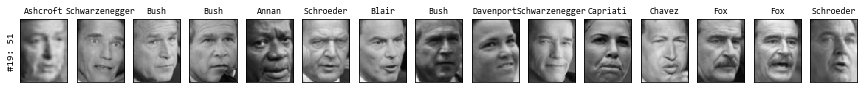

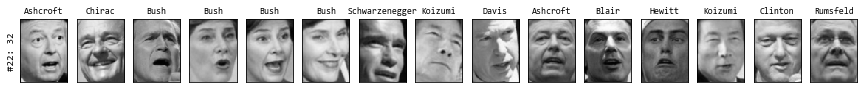

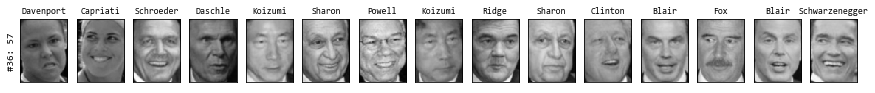

In [41]:
# 基于 ward 使用凝聚聚类提取簇
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering:\n {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # 人工选择「感兴趣」的簇
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

### 3.5.5 聚类方法小结

聚类的应用和评估是一个定性的过程，主要应用在数据分析的探索阶段。

主要的三种聚类算法都可以控制聚类的粒度 ( granularity ) ：

-   K 均值：指定簇的数量，用簇的平均值来表示簇，也可以看作分解方法，每个数据点由其簇中心表示。

-   DBSCAN：定义接近程度，检测没有被分配到簇的「噪声点」，帮助自动判断簇的数量。允许簇具有复杂的形状，可以生成大小判别很大的簇。

-   凝聚聚类：指定簇的数量。提供数据可能划分的整个层次结构，并且通过树状图查看。

## 3.6 小结与展望

无监督学习算法，可以用于探索性地数据分析和数据预处理，找出数据的正确表示。

分解、流形学习和聚类都是加深数据理解的重要工具 。
在没有监督信息的情况下，也是理解数据的仅有方法。
即使在监督学习中，探索性工具对于更好地理解数据性质也很重要。

#### 估计器接口小结
Scikit-Learn 中的所有算法都被实现为类，这些类叫做「估计器」(Estimator)。

In [42]:
# 特定类的对象实例化
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

-   构建模型：fit()
-   创建输入数据的新的表示：transform()
-   创建新的输出形式的表示：predict()
-   评估有监督模型：score()

表3-1：Scikit-Learn API 小结

![api_table](images/api_table.png)